# **Importaciones**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# **Punto Nº1**

$dX_t = \mu X_t dt + \sigma X_t dB_t$

Por Euler Maruyama $X_{t_i} = X_{t_i -1} + \mu X_{t_i -1} \Delta t + \sigma X_{t_i -1} \Delta B_{t_i}$  

Por Milstein $X_{t_i} = X_{t_i -1} + \mu X_{t_i -1} \Delta t + \sigma X_{t_i -1} \Delta B_{t_i} + \frac{1}{2} \sigma X_{t_i-1} ((\Delta B_{t_i})^2 - \Delta t_i)$  

In [2]:
def B_t(N, dt):
    browniano=[0]

    for i in range(N):
        browniano.append(browniano[-1]+np.sqrt(dt)*random.gauss(0,1))  
    return browniano

### Parámetros

In [3]:
mu = 0.25
sigma = 0.4
T = 1
x0 = 1

### Soluciones numéricas y exacta

In [14]:
def solutions(x0, N, T, mu, sigma):
    dt = T/N
    t = np.linspace(0, T, N+1)

    euler = np.zeros(N+1)
    euler[0] = x0
    milst = np.zeros(N+1)
    milst[0] = x0
    exacta = np.zeros(N+1)
    exacta[0] = x0

    Bt = B_t(N,dt)

    for i in range(N):
        dB_t = np.random.normal(0, np.sqrt(dt))
        #dB_t = Bt[i+1]-Bt[i] 
        euler[i+1] = euler[i] + mu * euler[i] * dt + sigma * euler[i] * dB_t
        milst[i+1] = milst[i] + mu * milst[i] * dt + sigma * milst[i] * dB_t + (1/2)*((sigma * milst[i]))*(dB_t**2 - dt)
        exacta[i+1] = exacta[i] * np.exp((mu - sigma**2/2) * dt + sigma * dB_t)
    
    return t, euler, milst, exacta

### Análisis visual y estadístico

El valor de ε_s para el método de aproximación de Euler Maruyama es de  0.08082135416435589  cuando Δt es 0.1
El valor de ε_s para el método de aproximación de Milstein es de  0.14446159623878554  cuando Δt es 0.1


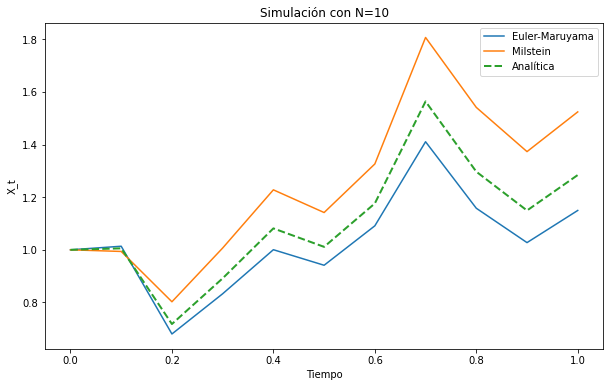

El valor de ε_s para el método de aproximación de Euler Maruyama es de  0.01632487643737055  cuando Δt es 0.047619047619047616
El valor de ε_s para el método de aproximación de Milstein es de  0.029451835264079008  cuando Δt es 0.047619047619047616


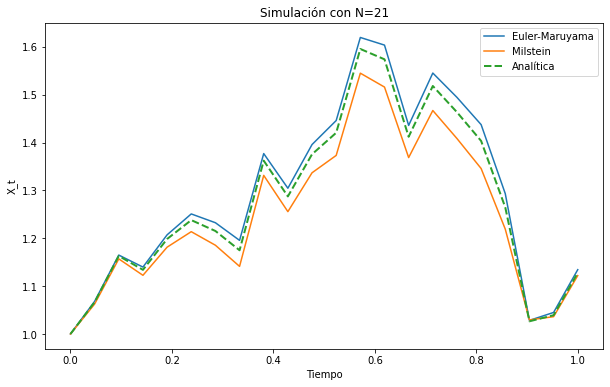

El valor de ε_s para el método de aproximación de Euler Maruyama es de  0.011750630107638481  cuando Δt es 0.021739130434782608
El valor de ε_s para el método de aproximación de Milstein es de  0.01693352619546866  cuando Δt es 0.021739130434782608


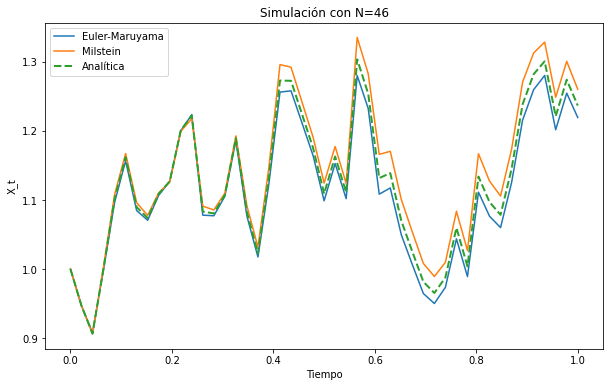

El valor de ε_s para el método de aproximación de Euler Maruyama es de  0.0017126115867092855  cuando Δt es 0.01
El valor de ε_s para el método de aproximación de Milstein es de  0.0027957463513317315  cuando Δt es 0.01


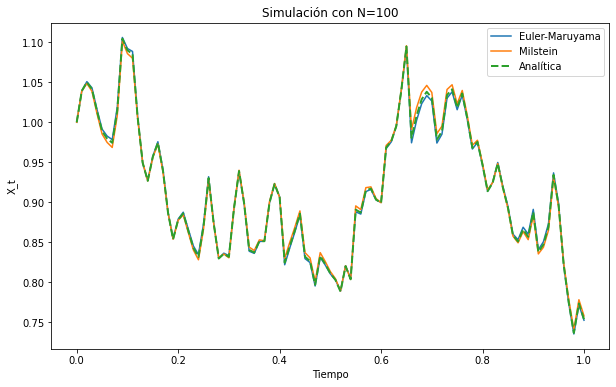

El valor de ε_s para el método de aproximación de Euler Maruyama es de  0.0015855025612100352  cuando Δt es 0.004651162790697674
El valor de ε_s para el método de aproximación de Milstein es de  0.0024271999290699873  cuando Δt es 0.004651162790697674


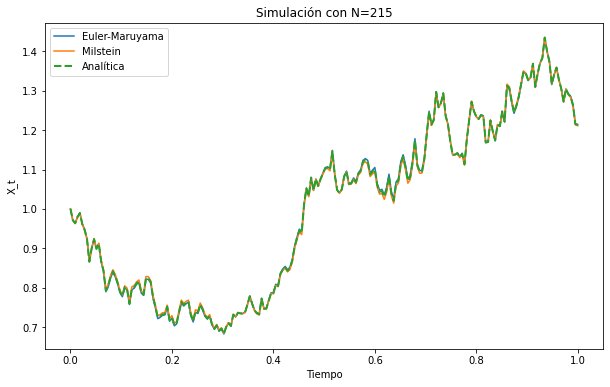

El valor de ε_s para el método de aproximación de Euler Maruyama es de  0.0008383260421810648  cuando Δt es 0.0021551724137931034
El valor de ε_s para el método de aproximación de Milstein es de  0.0012253467377933713  cuando Δt es 0.0021551724137931034


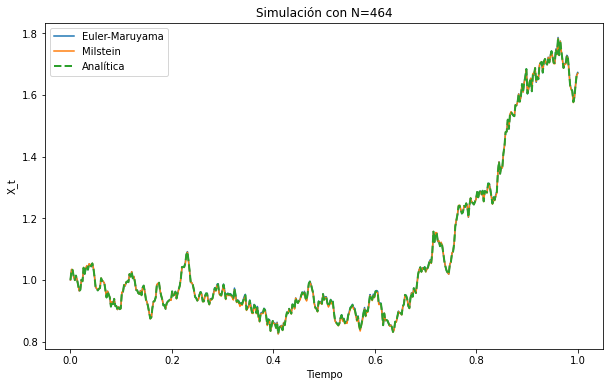

El valor de ε_s para el método de aproximación de Euler Maruyama es de  0.002932517332712271  cuando Δt es 0.001
El valor de ε_s para el método de aproximación de Milstein es de  0.004710960575536142  cuando Δt es 0.001


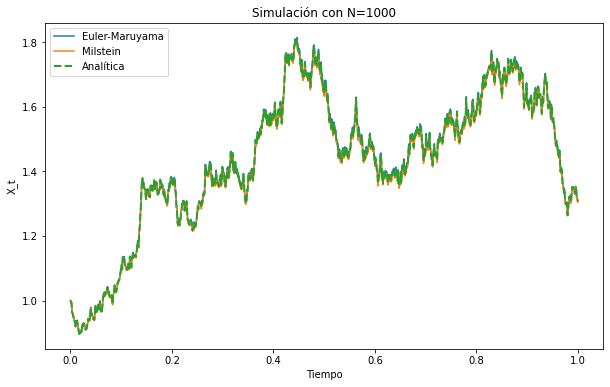

El valor de ε_s para el método de aproximación de Euler Maruyama es de  0.0005445730763767145  cuando Δt es 0.00046425255338904364
El valor de ε_s para el método de aproximación de Milstein es de  0.0008593340604974187  cuando Δt es 0.00046425255338904364


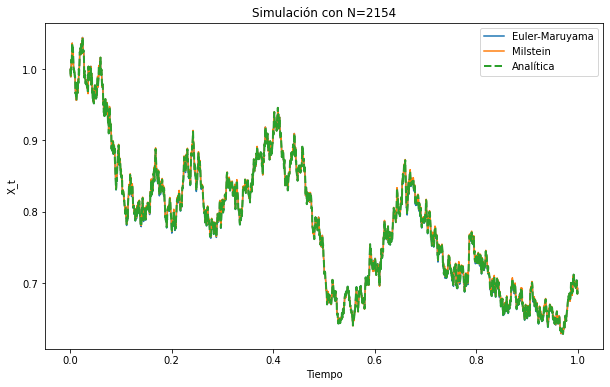

El valor de ε_s para el método de aproximación de Euler Maruyama es de  0.0007014159862571573  cuando Δt es 0.00021547080370609782
El valor de ε_s para el método de aproximación de Milstein es de  0.001044008360929174  cuando Δt es 0.00021547080370609782


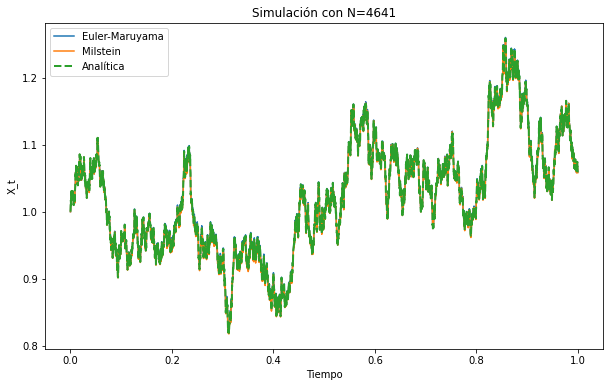

El valor de ε_s para el método de aproximación de Euler Maruyama es de  0.0005148671568805074  cuando Δt es 0.0001
El valor de ε_s para el método de aproximación de Milstein es de  0.0007768505590367484  cuando Δt es 0.0001


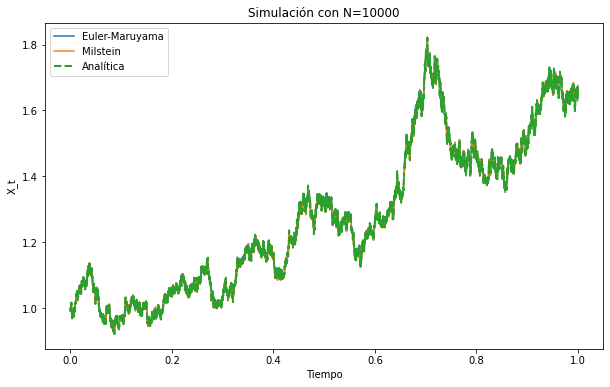

In [24]:
mse_euler = []
mse_milstein = []
N_values = np.geomspace(10, 10000, num=10, dtype=int) # Valores de N en escala logarítmica

for N in N_values:
    # Soluciones
    t, x_euler, x_milstein, x_analytic = solutions(x0, N, T, mu, sigma)

    # Cálculo del MSE
    mse_euler.append(np.mean((x_euler - x_analytic)**2))
    mse_milstein.append(np.mean((x_milstein - x_analytic)**2))

    # e_s
    print("El valor de ε_s para el método de aproximación de Euler Maruyama es de ", np.mean(np.abs(x_analytic-x_euler)), " cuando Δt es", T/N)
    print("El valor de ε_s para el método de aproximación de Milstein es de ", np.mean(np.abs(x_analytic-x_milstein)), " cuando Δt es", T/N)

    # Gráfico para visualización
    plt.figure(figsize=(10, 6))
    plt.plot(t, x_euler, label='Euler-Maruyama')
    plt.plot(t, x_milstein, label='Milstein')
    plt.plot(t, x_analytic, label='Analítica', linewidth=2, linestyle='--')
    plt.xlabel('Tiempo')
    plt.ylabel('X_t')
    plt.title(f'Simulación con N={N}')
    plt.legend()
    plt.show()

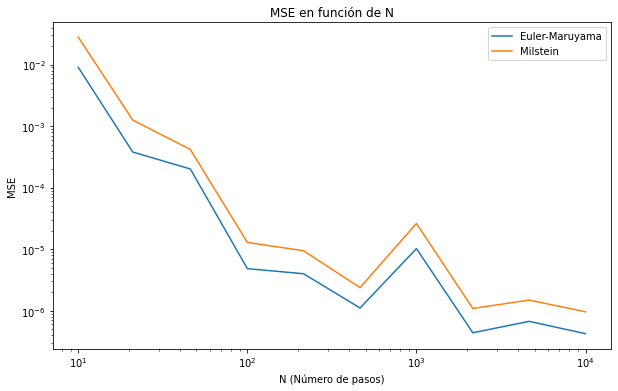

In [25]:
# Análisis estadístico - Gráfico de MSE
plt.figure(figsize=(10, 6))
plt.plot(N_values, mse_euler, label='Euler-Maruyama', )
plt.plot(N_values, mse_milstein, label='Milstein')
plt.xlabel('N (Número de pasos)')
plt.ylabel('MSE')
plt.xscale('log')
plt.yscale('log')
plt.title('MSE en función de N')
plt.legend()
plt.show()

# Punto Nº2

$dS_t = \mu S_t dt + \sigma S_t dB_t $

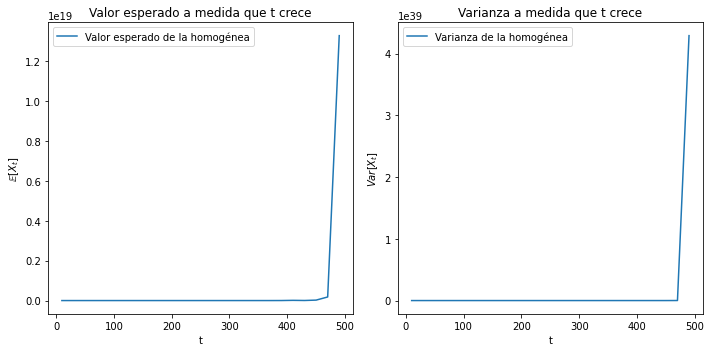

In [28]:
times= np.arange(10,500,20)
mu, sigma = 0.1, 0.1
valor_esperado_homogenea = []
varianza_homogenea = []

for t in times:
    t_max = t  # Tiempo máximo para la simulación
    dt = 0.1  # Tamaño del paso temporal
    N = int(t_max / dt)  # Número de pasos

    x_homogenea = np.zeros(N)
    x_homogenea[0] = 1.0 

    for i in range(N-1):
        dB_t = np.random.normal(0, np.sqrt(dt))  
        x_homogenea[i+1] = x_homogenea[i] + mu * x_homogenea[i] * dt + sigma * x_homogenea[i] * dB_t

    valor_esperado_homogenea.append(np.mean(x_homogenea))
    varianza_homogenea.append(np.var(x_homogenea))


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  
plt.plot(times, valor_esperado_homogenea, label="Valor esperado de la homogénea")
plt.xlabel("t")
plt.ylabel(r'$\mathbb{E}[X_t]$')
plt.legend()
plt.title("Valor esperado a medida que t crece")

plt.subplot(1, 2, 2)
plt.plot(times, varianza_homogenea, label="Varianza de la homogénea")
plt.xlabel("t")
plt.ylabel(r'$Var[X_t]$')
plt.legend()
plt.title("Varianza a medida que t crece")
plt.tight_layout() 
plt.show()


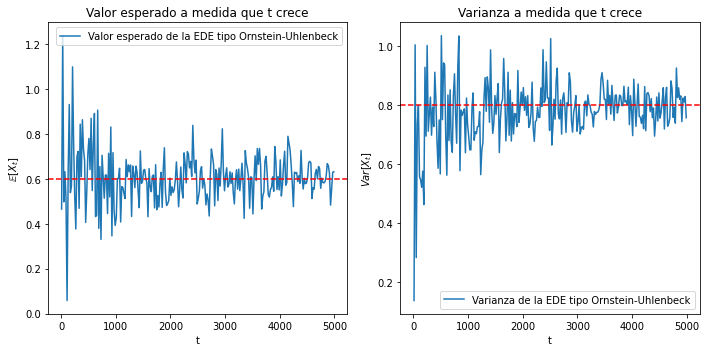

In [37]:
times= np.arange(10,5000,20)
alpha, mu, sigma = 0.1, 0.6, 0.4
expected_value_ou=[]
variance_ou=[]

for t in times:
    t_max = t 
    dt = 0.01 
    N = int(t_max / dt)  

    X_ou = np.zeros(N)
    X_ou[0] = 1.0  

    for t in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))  
        X_ou[t] = X_ou[t-1] + alpha * (mu - X_ou[t-1]) * dt + sigma * dW

    expected_value_ou.append(np.mean(X_ou))
    variance_ou.append(np.var(X_ou))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1) 
plt.plot(times, expected_value_ou, label="Valor esperado de la EDE tipo Ornstein-Uhlenbeck")
plt.axhline(y=mu, color='r', linestyle='--')  # Línea horizontal en y=2
plt.title("Valor esperado a medida que t crece")
plt.xlabel("t")
plt.ylabel(r'$\mathbb{E}[X_t]$')
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(times, variance_ou, label="Varianza de la EDE tipo Ornstein-Uhlenbeck")
plt.title("Varianza a medida que t crece")
plt.axhline(y=(sigma**2)/(2*alpha), color='r', linestyle='--')  # Línea horizontal en y=2
plt.xlabel("t")
plt.ylabel(r'$Var[X_t]$')
plt.legend()

plt.tight_layout()  
plt.show()


$dS_t = \lambda (\mu - S_t)dt + \sigma S_t dB_t$